In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import tensorflow as tf

In [2]:
house_df = pd.read_csv("casa.csv")

In [3]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Sempre antes de treinar um modelo, faça um plote com o Heatmap, pois você poderá correlacionar os parâmetros e ver qual você deve deixar/retirar do modelo. 

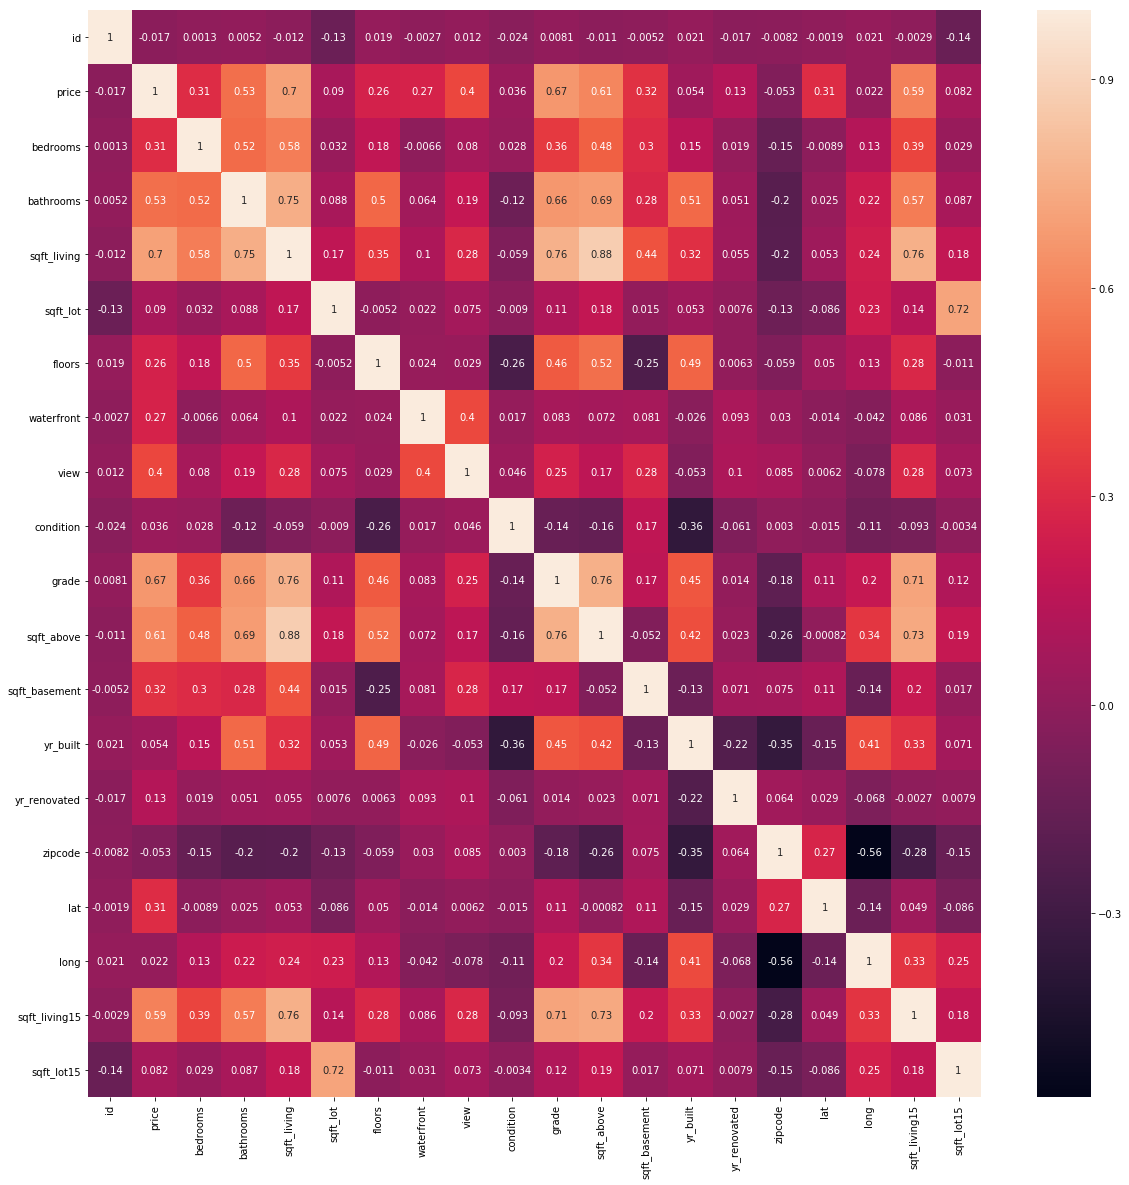

In [8]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(house_df.corr(),annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbdbe747860>,
      dtype=object)

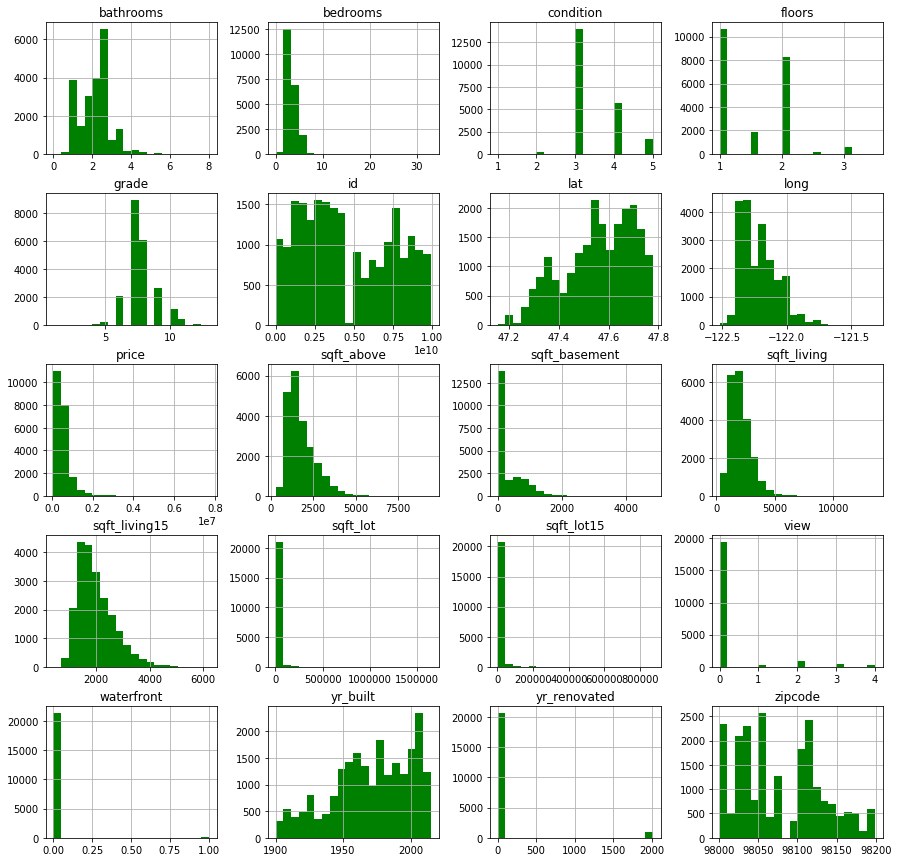

In [10]:
house_df.hist(figsize = (15,15), color = 'g', bins =20)

In [12]:
select_feature = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'floors',
    'sqft_above',
    'sqft_basement'
]

In [13]:
X = house_df[select_feature]

In [20]:
y = house_df['price']

In [21]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [16]:
X.shape

(21613, 6)

In [17]:
y.shape

(21613,)

#### RESCALAR OS ATRIBUTOS, PARA QUE A REDE NEURAL NÃO CLASSIFIQUE OS VALORES MAIORES COMO MAIS IMPORTANTES, ALÉM DE MELHORAR O PROCESSAMENTO

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_scaled.shape

(21613, 6)

In [25]:
y.shape # ex: y = [1,2,3,4...]

(21613,)

In [26]:
y = y.values.reshape(-1,1)
#Precisamos deixar em formato de matriz

#ex: y = [[1],[2],[3],[4]...]

In [27]:
y.shape

(21613, 1)

In [ ]:
# Também fazer o escalonamento na variável Y

In [28]:
y_scaled = scaler.fit_transform(y)

In [29]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X_scaled,
    y_scaled,
    test_size = 0.25,
)

In [32]:
X_train.shape,X_test.shape

((16209, 6), (5404, 6))

In [33]:
y_train.shape,y_test.shape

((16209, 1), (5404, 1))

### Criação do Modelo

In [35]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 100,activation = 'relu', input_shape = (7,)))
model.add(tf.keras.layers.Dense(units = 100,activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 100,activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1,activation = 'linear'))